# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  brain_categorical.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  Male or Female
AGE: Age Range  20-46 or 46+
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32



In [2]:
# Read the csv file into a pandas DataFrame

brain = pd.read_csv('../Resources/brain_categorical.csv')
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
X = brain[["gender", "age", "size"]]
y = brain["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


## Working with Categorical Data

What's wrong with the following code?

```
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
```

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [4]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["gender"])
data_binary_encoded.head()

,age,size,gender_Female,gender_Male
0,20-46,4512,0,1
1,20-46,3738,0,1
2,20-46,4261,0,1
3,20-46,3777,0,1
4,20-46,4177,0,1


We can encode multiple columns using `get_dummies`.

In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [9]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

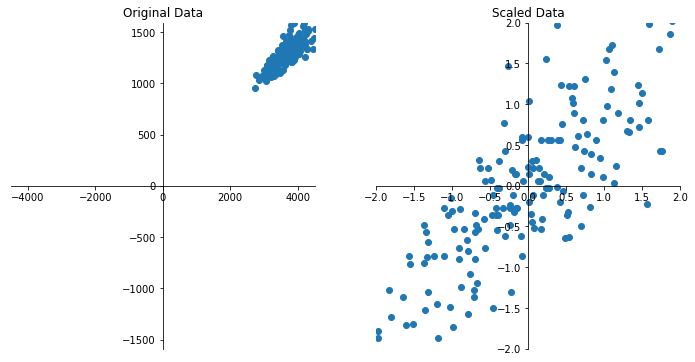

In [10]:
plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [11]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


Step 2) Split data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

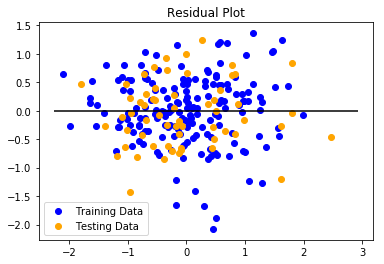

In [14]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [15]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230551580991294, R2: 0.6804912531419804


Your Turn!